# AirburstSolver User Guide #

In [26]:
# import
import deepimpact

## Running a simulation : ##
### Step 1: Initialize the Planet Object ###

In [27]:
earth = deepimpact.Planet()

### Step 2: Solve Atmospheric Entry ###

Use the solve_atmospheric_entry method to simulate the meteoroid's atmospheric entry. We need to provide several input parameters:

* Meteoroid radius (m)
* Meteoroid velocity (m/s)
* Meteoroid density (kg/m$^3$)
* Meteoroid strength (Pa)
* Meteoroid trajectory angle (degrees)

In [28]:
result = earth.solve_atmospheric_entry(radius=35, angle=45,
                                       strength=1e7, density=3000,
                                       velocity=19e3)
result

,time,velocity,mass,angle,altitude,distance,radius
0,0.00,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000
1,0.25,19001.732017,5.387830e+08,44.975476,96641.808504,3308.569415,35.000000
2,0.50,19003.462356,5.387827e+08,44.950922,93284.750349,6620.575462,35.000000
3,0.75,19005.190529,5.387823e+08,44.926340,89928.828462,9936.022131,35.000000
4,1.00,19006.915795,5.387816e+08,44.901728,86574.045879,13254.913311,35.000000
...,...,...,...,...,...,...,...
218,54.50,85.364855,8.775495e+07,89.129317,88.330817,97236.363343,257.743771
219,54.75,85.246186,8.775476e+07,89.152287,67.006841,97236.683115,257.743771
220,55.00,85.127826,8.775456e+07,89.174636,45.712366,97236.994023,257.743771
221,55.25,85.009775,8.775437e+07,89.196382,24.447321,97237.296319,257.743771


### Step 3: Calculate Energy ###
Calculate the kinetic energy and energy loss during the atmospheric entry.

In [29]:
result = earth.calculate_energy(result)

result

,time,velocity,mass,angle,altitude,distance,radius,dedz
0,0.00,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000,0.000000
1,0.25,19001.732017,5.387830e+08,44.975476,96641.808504,3308.569415,35.000000,-1.259594
2,0.50,19003.462356,5.387827e+08,44.950922,93284.750349,6620.575462,35.000000,-1.257681
3,0.75,19005.190529,5.387823e+08,44.926340,89928.828462,9936.022131,35.000000,-1.254768
4,1.00,19006.915795,5.387816e+08,44.901728,86574.045879,13254.913311,35.000000,-1.250335
...,...,...,...,...,...,...,...,...
218,54.50,85.364855,8.775495e+07,89.129317,88.330817,97236.363343,257.743771,0.009991
219,54.75,85.246186,8.775476e+07,89.152287,67.006841,97236.683115,257.743771,0.009965
220,55.00,85.127826,8.775456e+07,89.174636,45.712366,97236.994023,257.743771,0.009939
221,55.25,85.009775,8.775437e+07,89.196382,24.447321,97237.296319,257.743771,0.009913


### Step 4: Analyze the Outcome ###
Determine whether the event results in an airburst or a cratering event and analyze other outcome metrics.

In [30]:
outcome = earth.analyse_outcome(result)

outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 2751.737626376074,
 'burst_altitude': 10662.567111342949,
 'burst_distance': 89603.06658316519,
 'burst_energy': 17634.759935367347}

## Interactive Simulation: ##

1. Adjust the input parameters using the provided sliders.
2. Click the 'Run Simulation' button to start the simulation.
3. The simulation will process the inputs and display the results in a series of graphs and data tables.

In [31]:
import ipywidgets as widgets
from ipywidgets import interactive

# Function to display the current value of the slider
def display_current_value(value):
    print(f"Current Value: {value}")

# Creating widgets for each input; change the min/max (etc) parameter when necessary
radius_widget = widgets.FloatSlider(value=35, min=0.1, max=1000, step=0.1, description='Radius (m):')
velocity_widget = widgets.FloatSlider(value=19000, min=1000, max=10e6, step=1000, description='Velocity (m/s):')
density_widget = widgets.FloatSlider(value=3000, min=500, max=8000, step=100, description='Density (kg/m^3):')
strength_widget = widgets.FloatSlider(value=1e6, min=1e5, max=1e9, step=1e6, description='Strength (Pa):')
angle_widget = widgets.FloatSlider(value=45, min=0, max=360, step=1, description='Angle (degrees):')
timestep_widget = widgets.FloatSlider(value=0.25, min=0.01, max=1, step=0.01, description='Timestep (s):')

# Linking each widget to the display function
interactive_radius = interactive(display_current_value, value=radius_widget)
interactive_velocity = interactive(display_current_value, value=velocity_widget)
interactive_density = interactive(display_current_value, value=density_widget)
interactive_strength = interactive(display_current_value, value=strength_widget)
interactive_angle = interactive(display_current_value, value=angle_widget)
interactive_timestep = interactive(display_current_value, value=timestep_widget)

# Displaying the widgets
display(interactive_radius,interactive_velocity, 
        interactive_density, interactive_strength, 
        interactive_angle, interactive_timestep)


interactive(children=(FloatSlider(value=35.0, description='Radius (m):', max=1000.0, min=0.1), Output()), _dom…

interactive(children=(FloatSlider(value=19000.0, description='Velocity (m/s):', max=10000000.0, min=1000.0, st…

interactive(children=(FloatSlider(value=3000.0, description='Density (kg/m^3):', max=8000.0, min=500.0, step=1…

interactive(children=(FloatSlider(value=1000000.0, description='Strength (Pa):', max=1000000000.0, min=100000.…

interactive(children=(FloatSlider(value=45.0, description='Angle (degrees):', max=360.0, step=1.0), Output()),…

interactive(children=(FloatSlider(value=0.25, description='Timestep (s):', max=1.0, min=0.01, step=0.01), Outp…

In [32]:
import matplotlib.pyplot as plt

# Data visualization
def display_results(result_df, outcome):
    # Display the dataframe and outcome dictionary
    display(result_df)
    display(outcome)

    # Setting up the figure for subplots
    fig, axs = plt.subplots(10, 1, figsize=(10, 20))  # 10 rows, 1 column

    # Plotting each feature in a separate subplot
    axs[0].plot(result_df['altitude'], result_df['mass'], label='Mass', color='blue')
    axs[0].set_title('Mass vs Altitude')
    axs[0].set_xlabel('Altitude (m)')
    axs[0].set_ylabel('Mass (kg)')

    axs[1].plot(result_df['altitude'], result_df['velocity'], label='Velocity', color='green')
    axs[1].set_title('Velocity vs Altitude')
    axs[1].set_xlabel('Altitude (m)')
    axs[1].set_ylabel('Velocity (m/s)')

    axs[2].plot(result_df['altitude'], result_df['angle'], label='Angle', color='red')
    axs[2].set_title('Angle vs Altitude')
    axs[2].set_xlabel('Altitude (m)')
    axs[2].set_ylabel('Angle (degrees)')

    axs[3].plot(result_df['altitude'], result_df['distance'], label='Distance', color='purple')
    axs[3].set_title('Distance vs Altitude')
    axs[3].set_xlabel('Altitude (m)')
    axs[3].set_ylabel('Distance (m)')

    axs[4].plot(result_df['altitude'], result_df['radius'], label='Radius', color='orange')
    axs[4].set_title('Radius vs Altitude')
    axs[4].set_xlabel('Altitude (m)')
    axs[4].set_ylabel('Radius (m)')

    axs[5].plot(result_df['time'], result_df['mass'], label='Mass', color='blue')
    axs[5].set_title('Mass vs Time')
    axs[5].set_xlabel('Time (s)')
    axs[5].set_ylabel('Mass (kg)')

    axs[6].plot(result_df['time'], result_df['velocity'], label='Velocity', color='green')
    axs[6].set_title('Velocity vs Time')
    axs[6].set_xlabel('Time (s)')
    axs[6].set_ylabel('Velocity (m/s)')

    axs[7].plot(result_df['time'], result_df['angle'], label='Angle', color='red')
    axs[7].set_title('Angle vs Time')
    axs[7].set_xlabel('Time (s)')
    axs[7].set_ylabel('Angle (degrees)')

    axs[8].plot(result_df['time'], result_df['distance'], label='Distance', color='purple')
    axs[8].set_title('Distance vs Time')
    axs[8].set_xlabel('Time (s)')
    axs[8].set_ylabel('Distance (m)')

    axs[9].plot(result_df['time'], result_df['radius'], label='Radius', color='orange')
    axs[9].set_title('Radius vs Time')
    axs[9].set_xlabel('Time (s)')
    axs[9].set_ylabel('Radius (m)')

    # Adjusting layout for better visibility
    plt.tight_layout()
    plt.show()



### Clike on the 'Run Simulation' button to display the results: ###

Button(description='Run Simulation', style=ButtonStyle())

,time,velocity,mass,angle,altitude,distance,radius,dedz
0,0.00,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000,0.000000
1,0.25,19001.732017,5.387830e+08,44.975476,96641.808504,3308.569415,35.000000,-1.259594
2,0.50,19003.462356,5.387827e+08,44.950922,93284.750349,6620.575462,35.000000,-1.257681
3,0.75,19005.190529,5.387823e+08,44.926340,89928.828462,9936.022131,35.000000,-1.254768
4,1.00,19006.915795,5.387816e+08,44.901728,86574.045879,13254.913311,35.000000,-1.250335
...,...,...,...,...,...,...,...,...
320,80.00,73.613169,8.775401e+07,89.910363,74.818898,95238.842230,296.851014,0.007389
321,80.25,73.525384,8.775385e+07,89.911356,56.426606,95238.870844,296.851014,0.007371
322,80.50,73.437816,8.775368e+07,89.912318,38.056232,95238.899110,296.851014,0.007352
323,80.75,73.350463,8.775352e+07,89.913249,19.707723,95238.927039,296.851014,0.007334


{'outcome': 'Airburst',
 'burst_peak_dedz': 2277.0843361414304,
 'burst_altitude': 11562.550608550682,
 'burst_distance': 88684.77949643643,
 'burst_energy': 20779.619616242166}

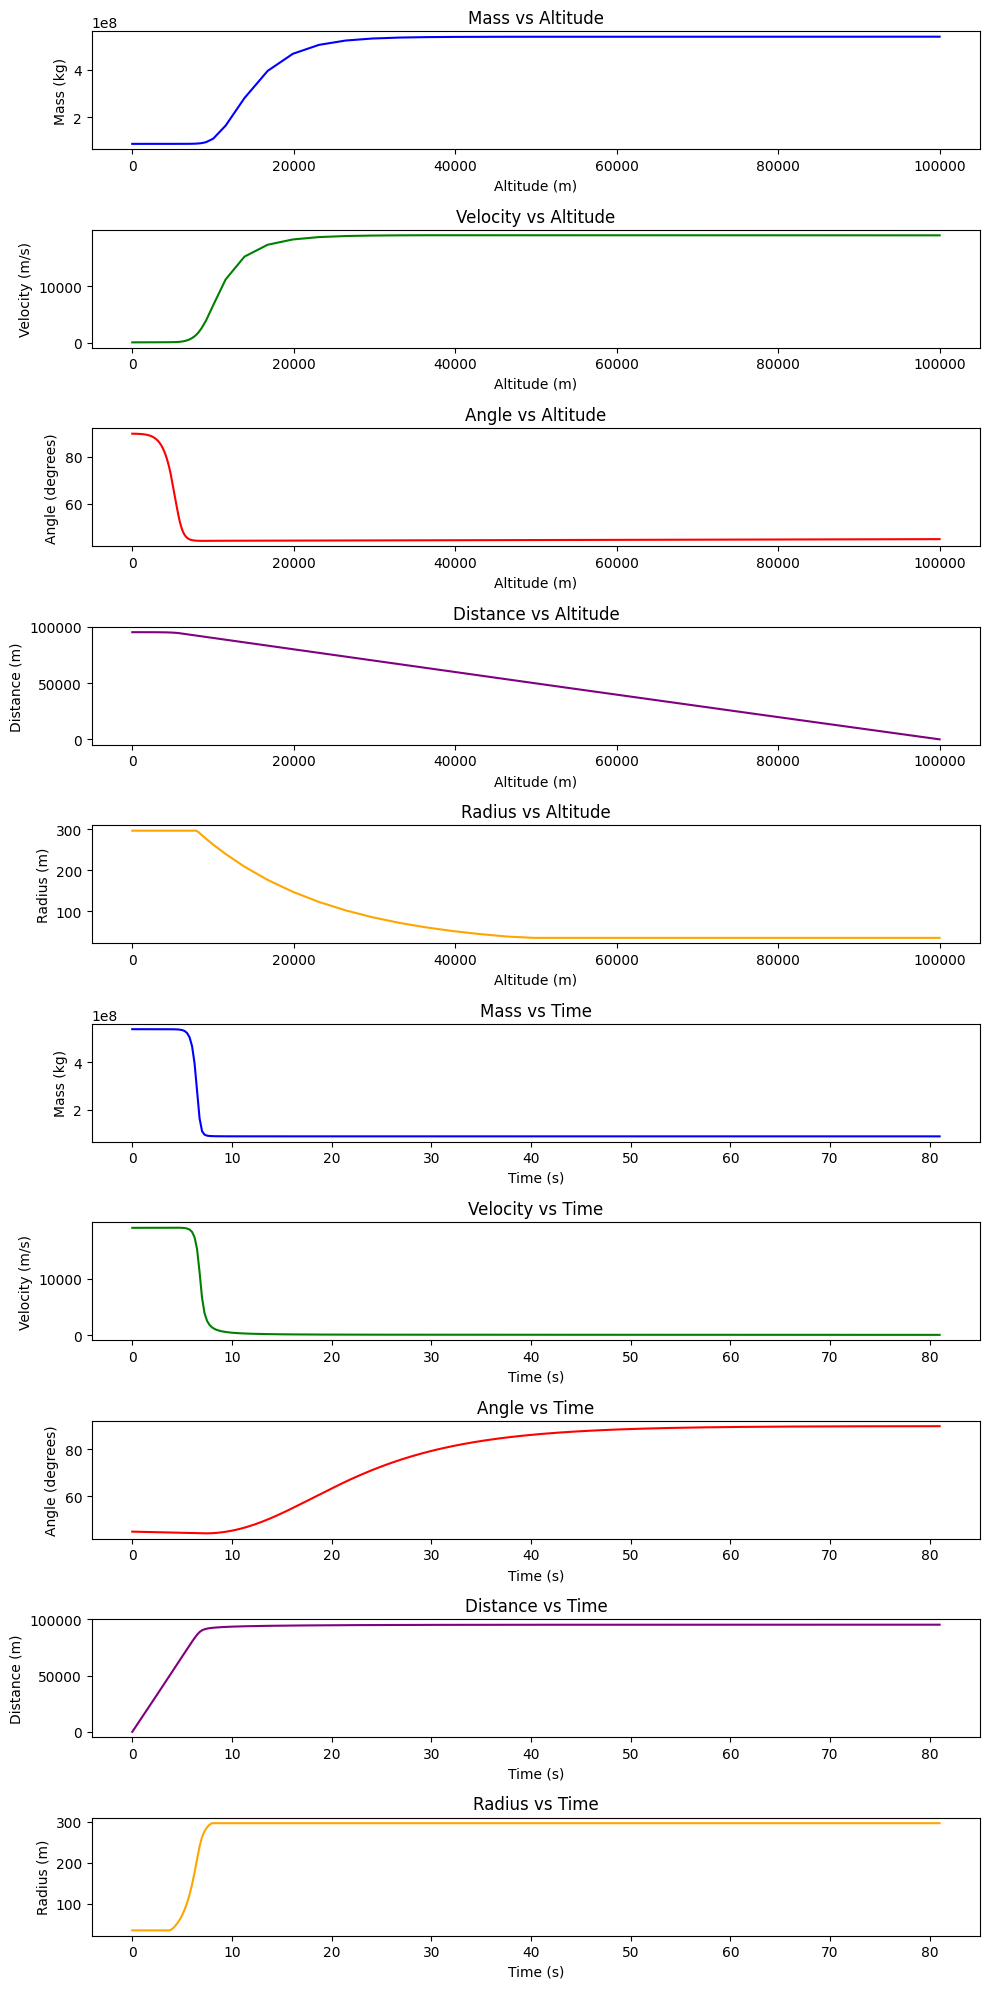

In [33]:
# Function to run on button click
def run_simulation(b):
    earth = deepimpact.Planet()
    # Getting values from widgets
    radius = radius_widget.value
    velocity = velocity_widget.value
    density = density_widget.value
    strength = strength_widget.value
    angle = angle_widget.value
    timestep = timestep_widget.value
    
    # Running the solver
    result_df = earth.solve_atmospheric_entry(radius, velocity, density, strength, angle, dt=timestep)
    result_df = earth.calculate_energy(result_df)
    outcome = earth.analyse_outcome(result_df)
    
    # Display results and plots
    display_results(result_df, outcome)

run_button = widgets.Button(description='Run Simulation')
run_button.on_click(run_simulation)
display(run_button)


### Understanding the Output ###

The output consists of:

* A Pandas dataframe: Shows various parameters like altitude, velocity, mass, etc., at each timestep.
* Graphs/Plots: Visual representations of the meteoroid’s mass, velocity, angle, distance, and radius over altitude (m).